# 第八章G：Python类中的静态变量和静态方法
___

## 1. 什么是静态变量

我们在C++中都学过静态变量，用static进行修饰的变量就是静态变量。但在Python中，不存在static修饰。

一般我们将定义在类中，但不是在其初始化方法`__init__()`中定义的变量称为静态变量或者类变量。

例如，在下面这个例子中：

In [5]:
class Number():
    num = 0

    @staticmethod
    def printNum():
        print(Number.num)
        
    def printNum(this):
        print(this.num)

我们可以用示意图看看这些变量在整个类中的角色：

In [9]:
import objgraph

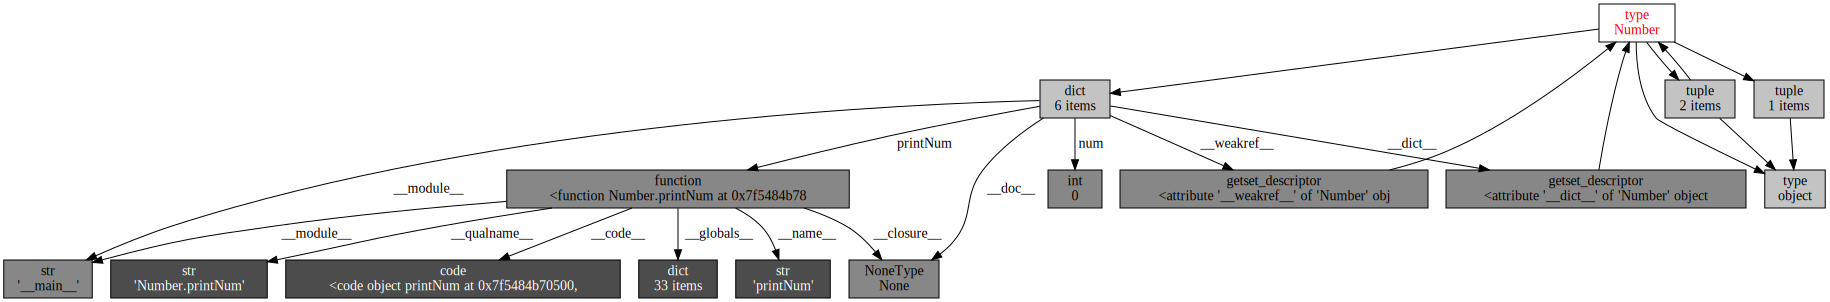

In [10]:
objgraph.show_refs([Number], filename="Number_Class.png")

对于实例来说呢，变量`num`又是在哪里？

0 0 0


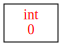

In [12]:
n1 = Number()
n2 = Number()
print(n1.num, n2.num, Number.num)
objgraph.show_refs([n1.num,n2.num, Number.num], filename="static_member.png")

2 0 0


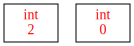

In [67]:
n1.num += 2
print(n1.num, n2.num, Number.num)
objgraph.show_refs([n1.num,n2.num, Number.num], filename="static_member.png")

2 15 0
140595028208848 140595028593424 94626471985040


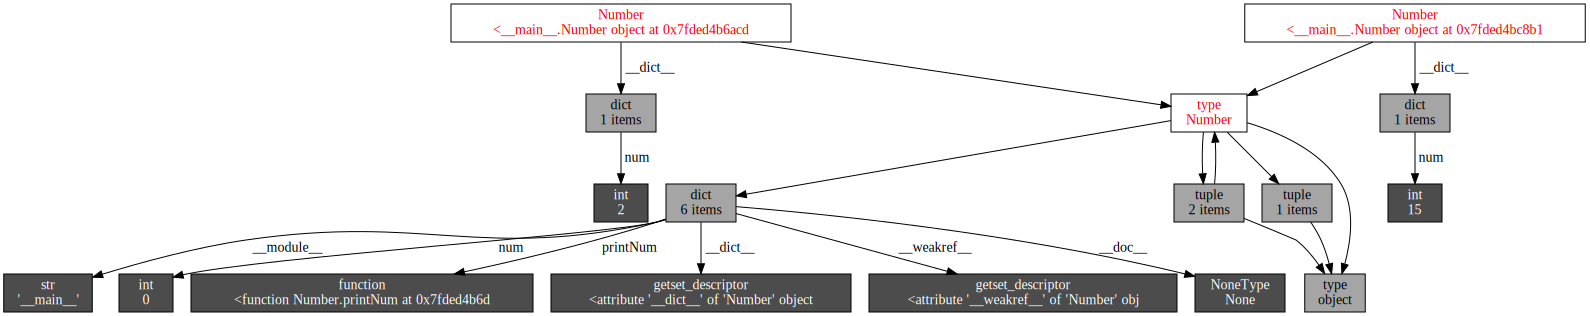

In [56]:
n2.num += 3
print(n1.num, n2.num, Number.num)
print(id(n1), id(n2), id(Number))
objgraph.show_refs([n1,n2, Number], filename="static_member.png", max_depth=2)

In [54]:
objgraph.show_refs?

In [23]:
n1.printNum()

2


In [24]:
n2.printNum()

3


In [25]:
Number.num = 5

In [30]:
print(n2.__Number_num)

AttributeError: 'Number' object has no attribute '__Number_num'

In [57]:
class TaskQueue():
    queue=[]
    
    def append(self,obj):
        self.queue.append(obj)
    
    def print_queue(self):
        print(self.queue)

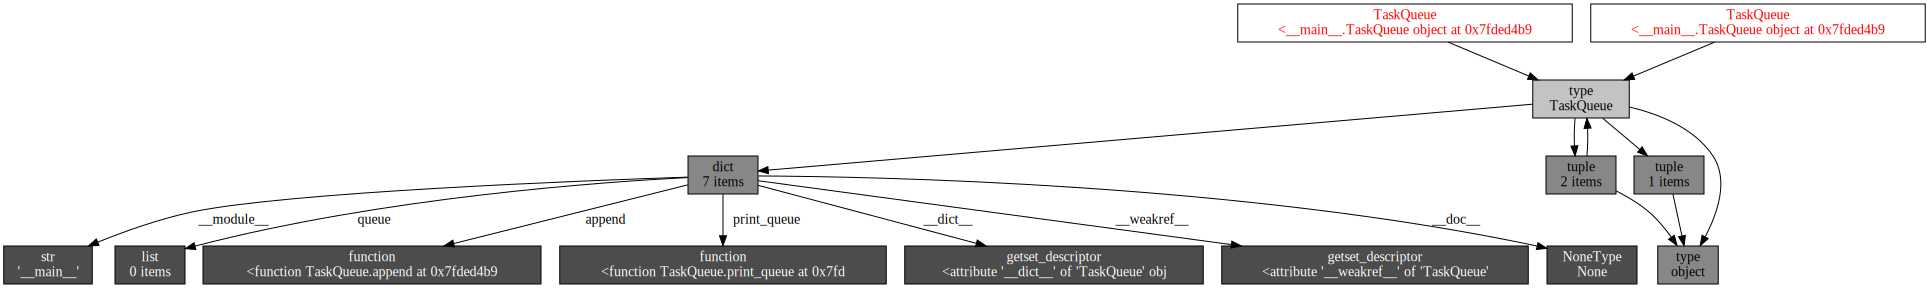

In [58]:
queue1 = TaskQueue()
queue2 = TaskQueue() 

objgraph.show_refs([queue1, queue2])

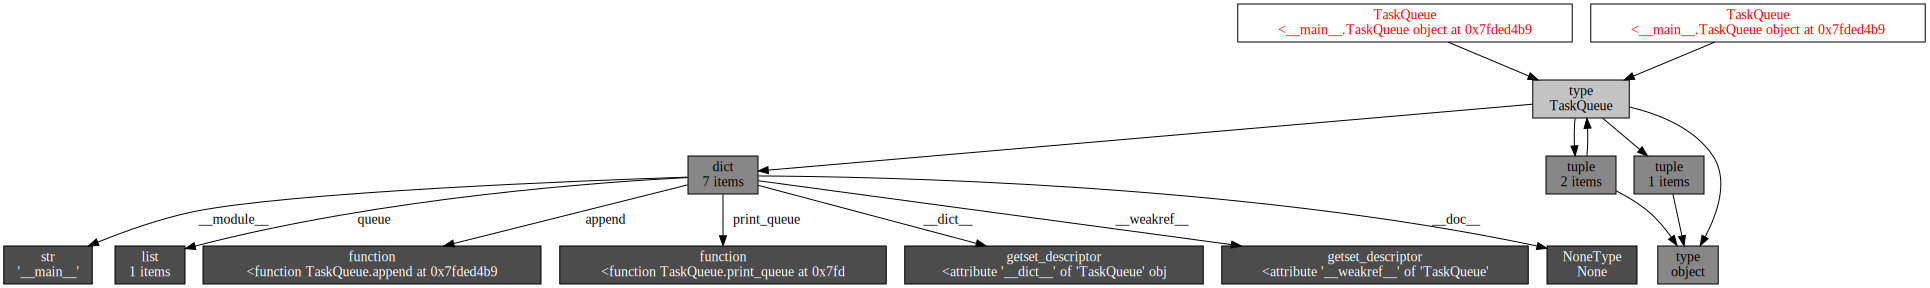

In [59]:
queue1.append(1)
objgraph.show_refs([queue1, queue2])

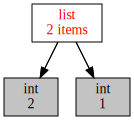

In [38]:
queue2.append(2)
objgraph.show_refs([queue1.queue, queue2.queue])

In [39]:
print(TaskQueue.queue)

[1, 2]


从以上现象我们可以得到什么结论？

如果静态变量为可变对象Mutable object，则有什么现象？

如果静态变量为不可变对象Immutable object，又会发生什么？

## 2. 什么是静态方法？